Let's plot up some summary plots for each tier of the scheduler

* RA,dec distribution
* alt,az distribution
* hourglass

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline
import rubin_sim.maf.plots as plots


In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
out_dir = 'tiers'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [3]:
bundle_list = []
subset_plots = [plots.HealpixSkyMap()]
notes = {"'DD:%'": {'title': "DDFs"}, "'pair_33%'": {'title': "33 Min Pairs"},
         "'pair_15%'": {"title": "15 Min Pairs"}, "'greedy%'": {"title": "Greedy"},
         "'ToO%'": {"title": 'ToO'}, "'twilight%'": {"title": "Twilight Earth-Interior"},
         "'blob_long%'": {"title": "Hours Timescale, Initial"}, "'long%'": {"title": "Hours Timescale, Final"}}

for note in notes:
    # col here could be anything
    metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
    # Select all the visits. Could do something like 'filter="r"' 
    sql = 'scheduler_note like %s' % note
    slicer = maf.slicers.HealpixSlicer()
    plot_dict = notes[note]
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict, plot_funcs=subset_plots))


    slicer = maf.slicers.HealpixSlicer(
        lat_col="altitude",
        lon_col="azimuth",
        lat_lon_deg=True,
        use_cache=False,
    )
    metric = maf.metrics.CountMetric("night", metric_name="Nvisits as function of Alt/Az")
    plot_funcs = [plots.LambertSkyMap()]
    plot_dict = notes[note]
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict, plot_funcs=plot_funcs))

    slicer = maf.slicers.HourglassSlicer()
    metric = maf.metrics.HourglassMetric(
            night_col="night", metric_name="Hourglass"
        )
    bundle = maf.MetricBundle(
            metric,
            slicer,
            sql + "and night < 730",
        plot_dict=plot_dict
        )
    bundle_list.append(bundle)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

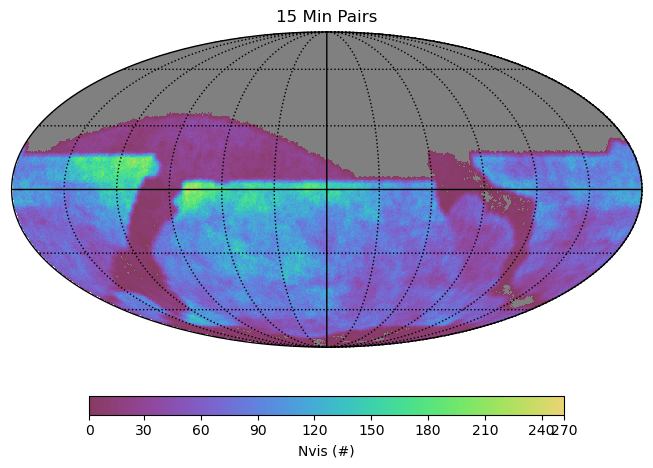

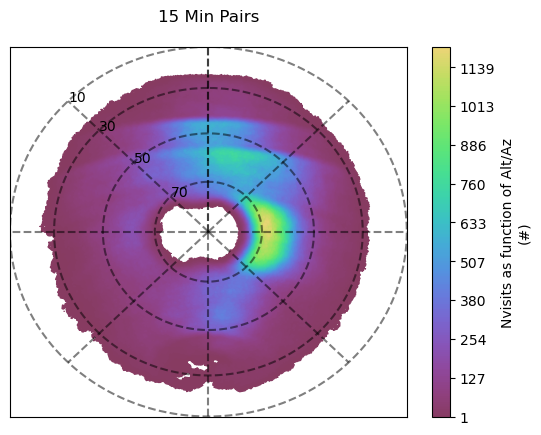

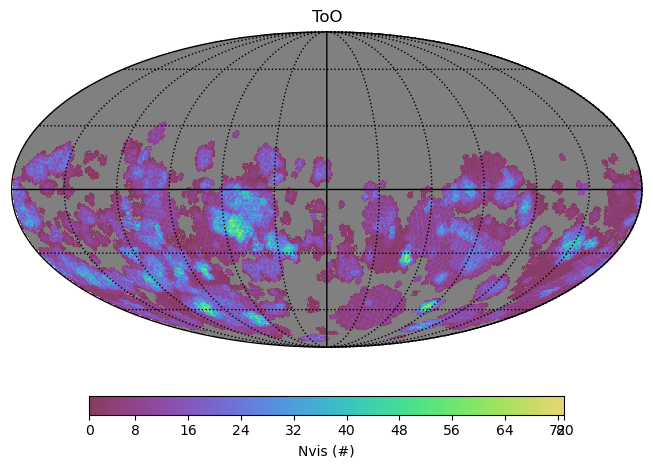

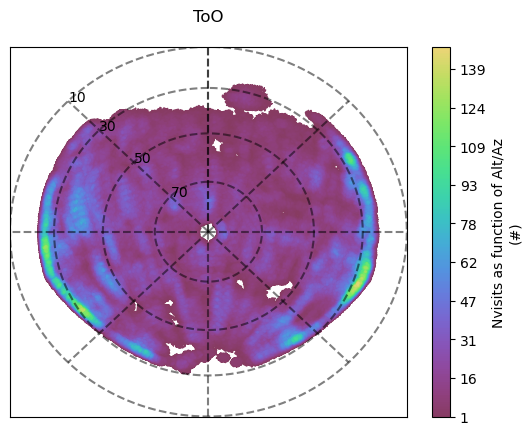

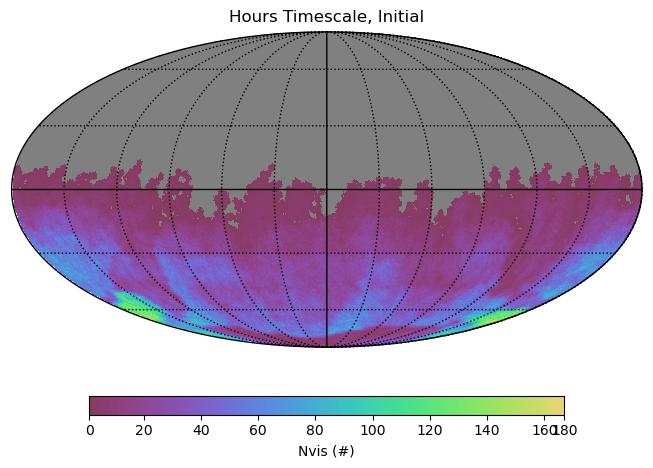

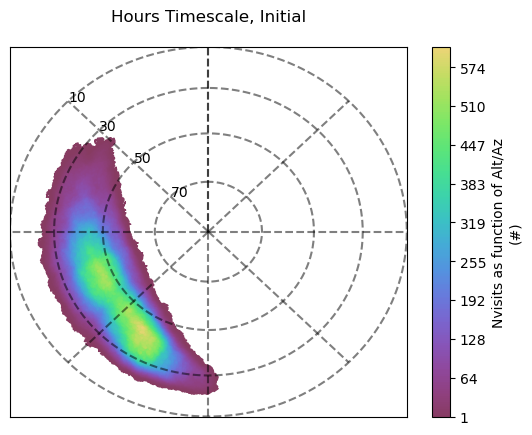

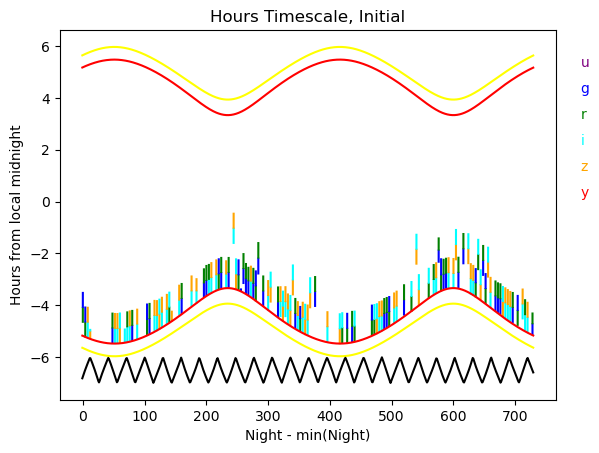

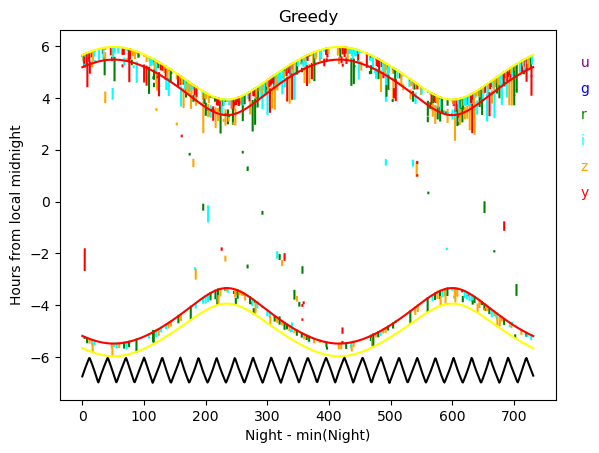

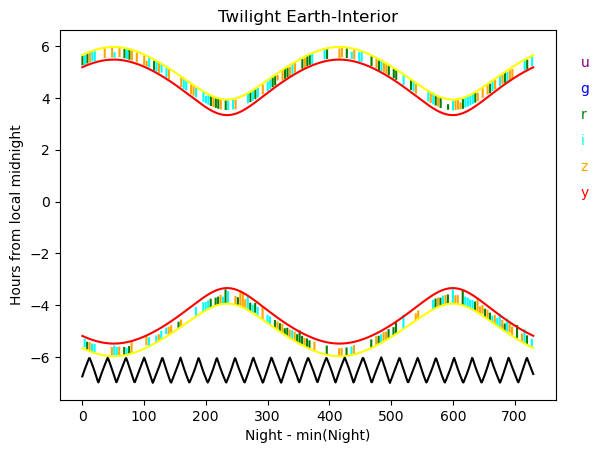

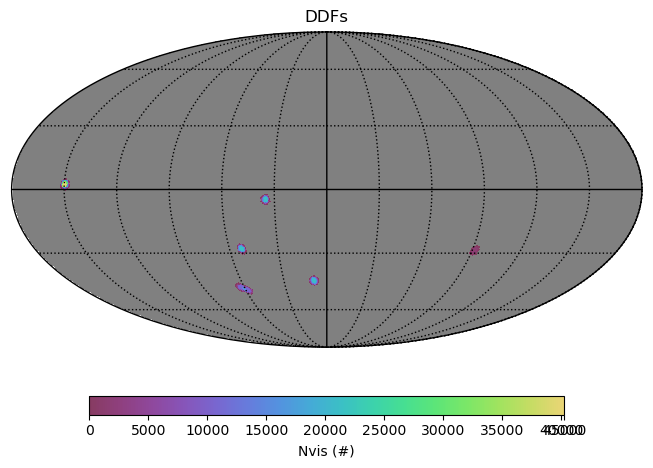

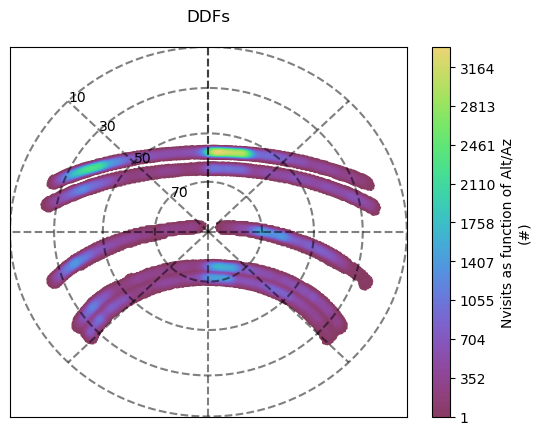

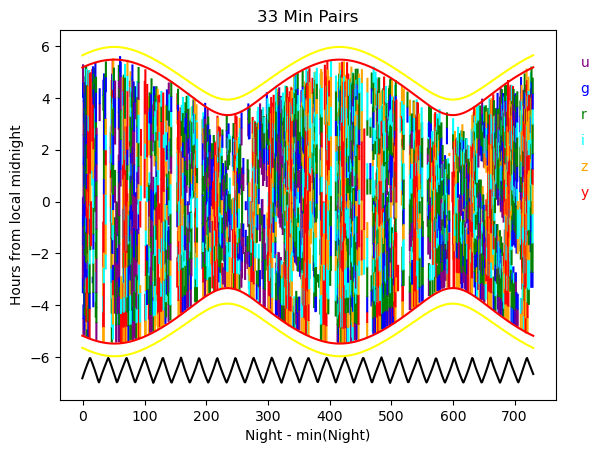

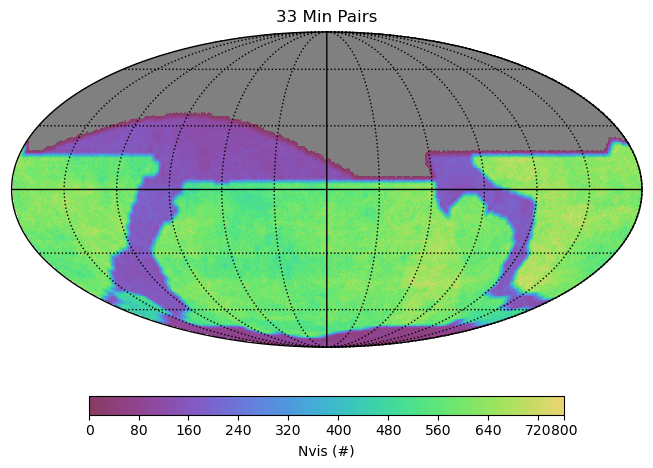

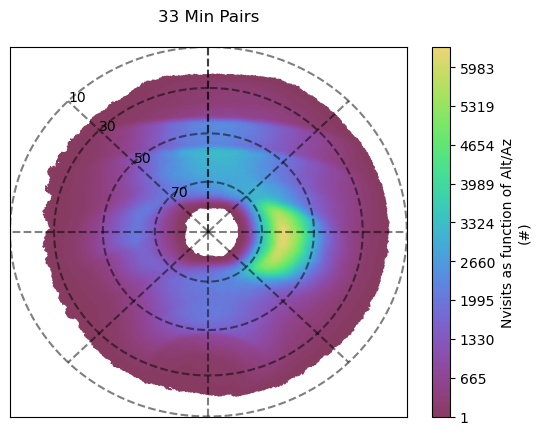

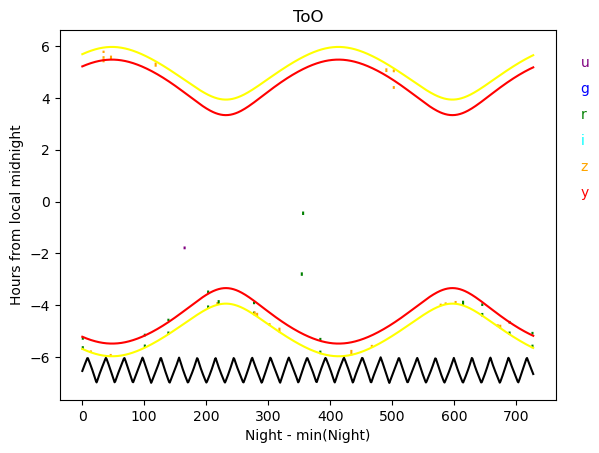

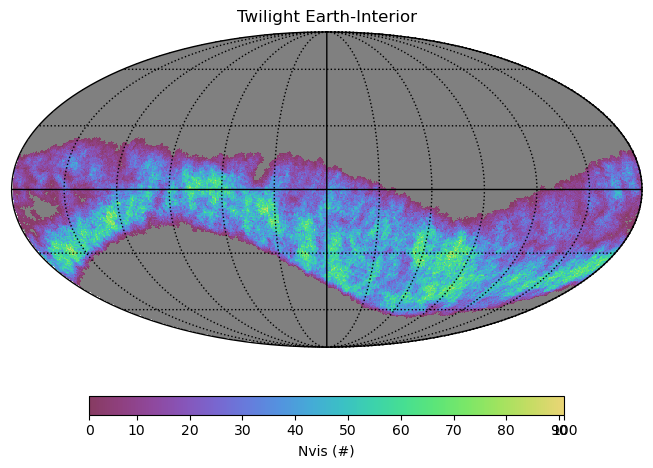

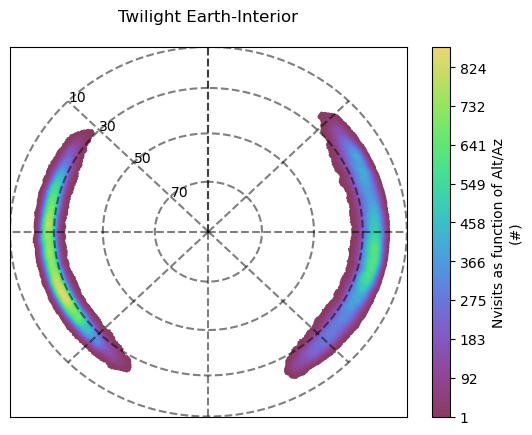

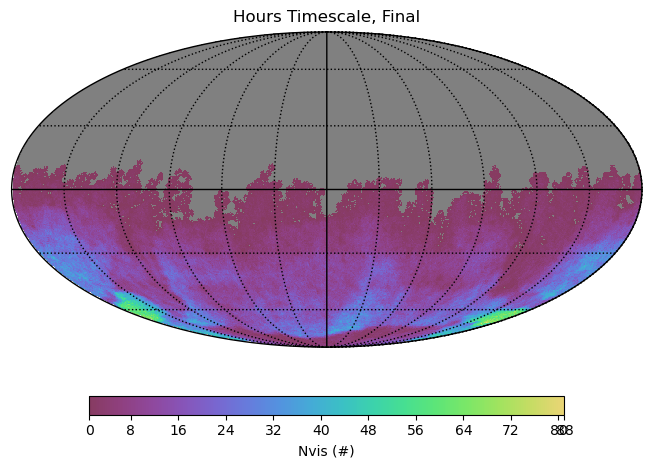

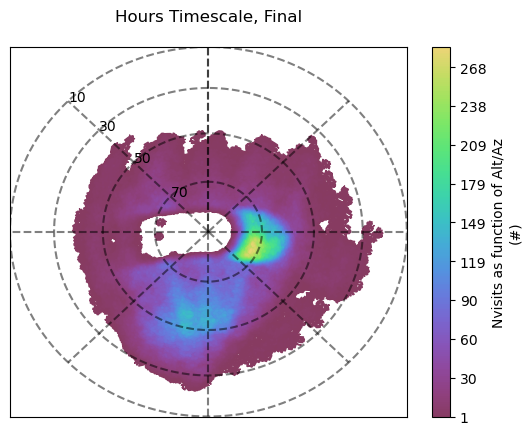

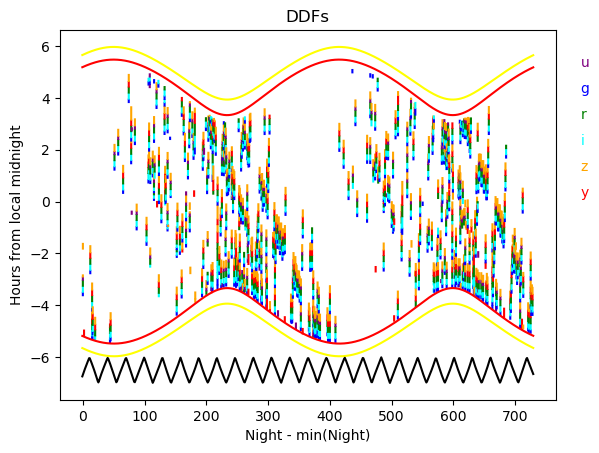

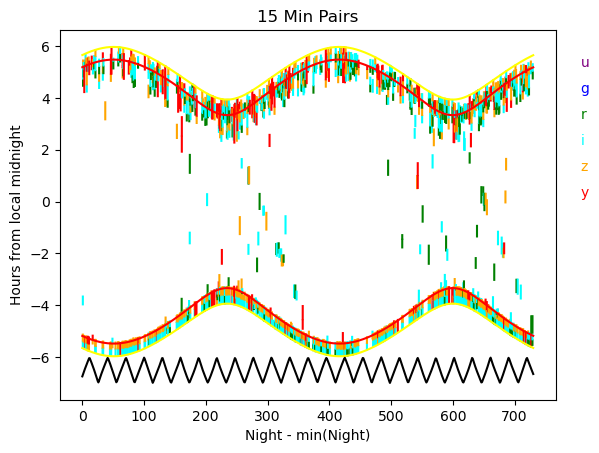

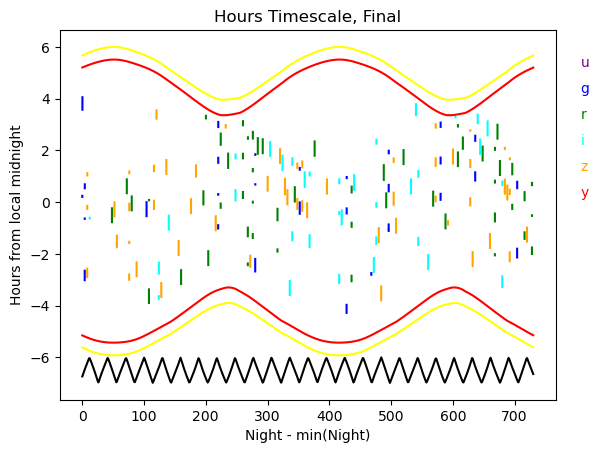

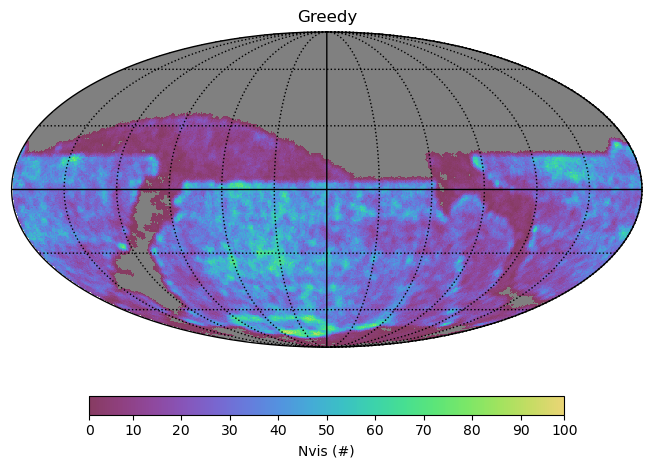

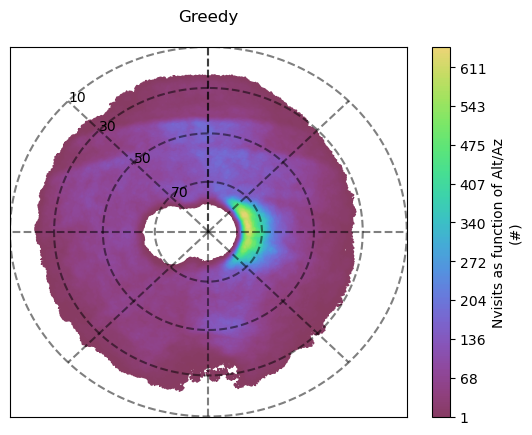

In [4]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)
